<h1 align="center"> 
  Air Quality
</h1>

<h4 align="center">
    <img alt="AirQuality" title="#AirQuality" src="https://www.healthissuesindia.com/wp-content/uploads/2020/02/81287396_l-2048x1365.jpg" width="400px;" />
</h4>

## 🔍 About

The following program intends to predict air quality based on the amount of carbon monoxide. This problem purpose by professor Diego Furtado in the discipline of Machine Learning aims to solve a known problem using linear regression methods. In sequence, we'll analyze some approaches to tackle this problem by predicting the quantity of carbon dioxide in the air.

In this [link](https://archive.ics.uci.edu/ml/datasets/Air+Quality), you can locate the dataset that was used. We also made a jupyter notebook available for a better comprehension of the topic.

### Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Reading and parsing data

In [2]:
# Reading .csv
air_quality = pd.read_csv(os.path.join('data', 'AirQualityUCI.csv'), delimiter=';')

# Removing 2 last columns that does not exist. Removing last 114 lines (does not cantain data).
# Also removes first two columns, 'Date' and 'Time'
air_quality = air_quality.iloc[:9356, 2:-2]

print(air_quality)

      CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        2.6       1360.0     150.0      11.9         1046.0    166.0   
1        2.0       1292.0     112.0       9.4          955.0    103.0   
2        2.2       1402.0      88.0       9.0          939.0    131.0   
3        2.2       1376.0      80.0       9.2          948.0    172.0   
4        1.6       1272.0      51.0       6.5          836.0    131.0   
...      ...          ...       ...       ...            ...      ...   
9351     3.9       1297.0    -200.0      13.6         1102.0    523.0   
9352     3.1       1314.0    -200.0      13.5         1101.0    472.0   
9353     2.4       1163.0    -200.0      11.4         1027.0    353.0   
9354     2.4       1142.0    -200.0      12.4         1063.0    293.0   
9355     2.1       1003.0    -200.0       9.5          961.0    235.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0           1056.0    113.0        1692.0     

### Correlation between all of the features

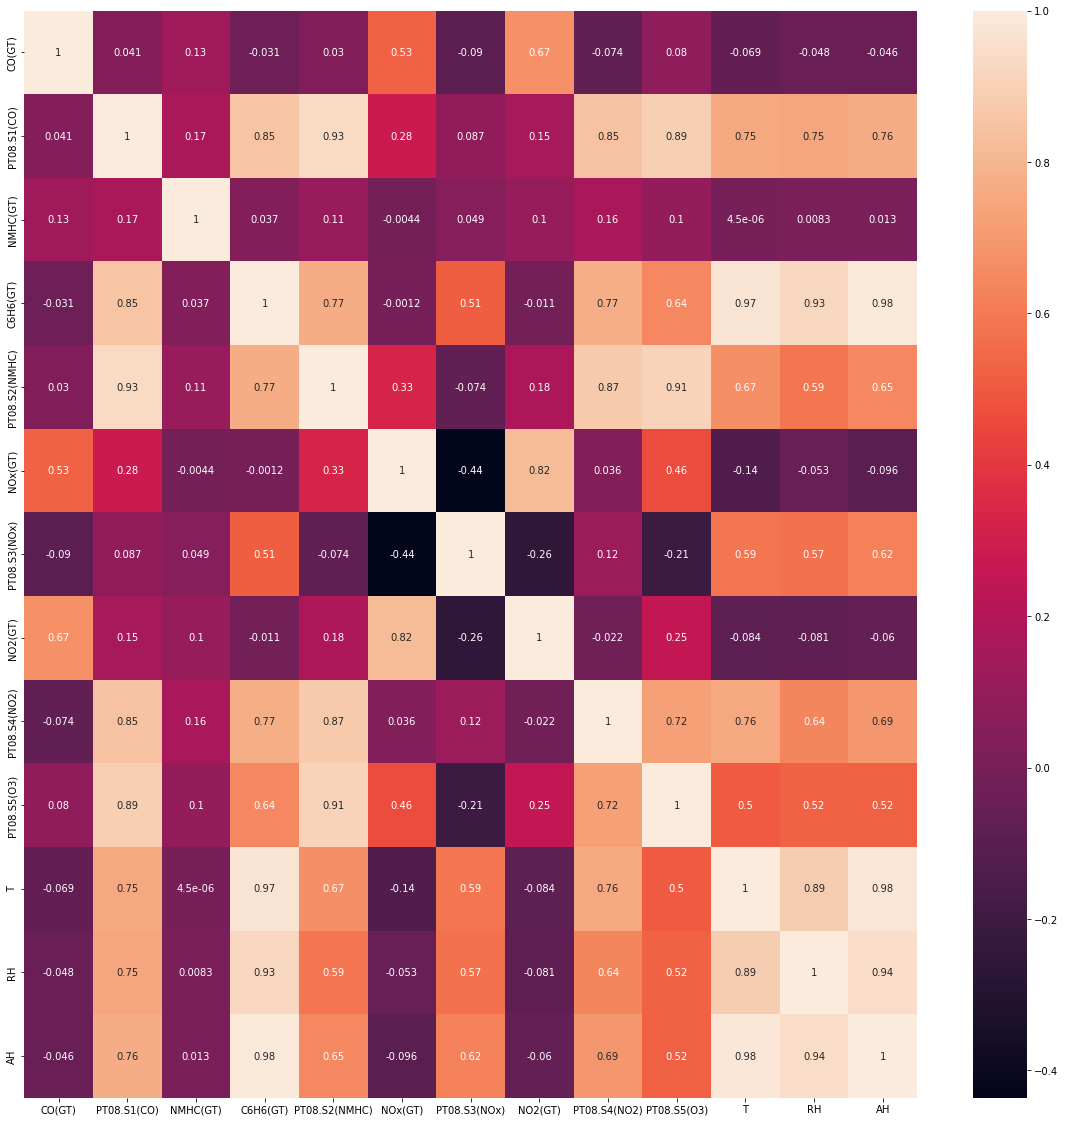

In [3]:
# Checking correlation between all features
plt.figure(figsize=(20,20))
sns.heatmap(air_quality.corr(), annot=True);
# plt.show()

### Selecting feature to be predicted and those that will be used in model

In [4]:
# Parsing the attributes based on highest correlation (O3, NO2, NHMC). Dropping those that will not be used.
x_air_quality_attributes = air_quality.drop(['CO(GT)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S5(O3)'], axis=1)
# x_air_quality_attributes = x_air_quality_attributes.apply(pd.to_numeric, errors='coerce')
# x_air_quality_attributes.fillna(0, inplace=True)
print(x_air_quality_attributes)
y_air_quality_attributes = air_quality.drop(['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'], axis=1)
# y_air_quality_attributes.fillna(0, inplace=True)
print(y_air_quality_attributes)

      PT08.S1(CO)  NMHC(GT)  C6H6(GT)  NOx(GT)  PT08.S3(NOx)  NO2(GT)     T  \
0          1360.0     150.0      11.9    166.0        1056.0    113.0  13.6   
1          1292.0     112.0       9.4    103.0        1174.0     92.0  13.3   
2          1402.0      88.0       9.0    131.0        1140.0    114.0  11.9   
3          1376.0      80.0       9.2    172.0        1092.0    122.0  11.0   
4          1272.0      51.0       6.5    131.0        1205.0    116.0  11.2   
...           ...       ...       ...      ...           ...      ...   ...   
9351       1297.0    -200.0      13.6    523.0         507.0    187.0  18.2   
9352       1314.0    -200.0      13.5    472.0         539.0    190.0  21.9   
9353       1163.0    -200.0      11.4    353.0         604.0    179.0  24.3   
9354       1142.0    -200.0      12.4    293.0         603.0    175.0  26.9   
9355       1003.0    -200.0       9.5    235.0         702.0    156.0  28.3   

        RH      AH  
0     48.9  0.7578  
1     47.

### Building our model

In [5]:
# Spliting test data
x_air_quality_training, x_air_quality_test, y_air_quality_training, y_air_quality_test = train_test_split(x_air_quality_attributes, y_air_quality_attributes, test_size = 0.3, random_state = 0)

# print(y_air_quality_test)

# Instantiating the regressor
regression = LinearRegression()
regression.fit(x_air_quality_training, y_air_quality_training)
y_air_quality_prediction = regression.predict(x_air_quality_test)

# Showing results
df = pd.DataFrame(data=y_air_quality_test)
df['PT08.S1(CO) - Predicted'] = y_air_quality_prediction
print(df)
# print(y_air_quality_test)
# print(y_air_quality_prediction)
# print(prediction)

      PT08.S1(CO)  PT08.S1(CO) - Predicted
1121        917.0                    917.0
8028        918.0                    918.0
3803        766.0                    766.0
4595        775.0                    775.0
587        1010.0                   1010.0
...           ...                      ...
5077       1606.0                   1606.0
4160        869.0                    869.0
9136       1347.0                   1347.0
607         969.0                    969.0
6276       1197.0                   1197.0

[2807 rows x 2 columns]
